<a href="https://colab.research.google.com/github/drshahizan/Python_EDA/blob/main/assignment/hpdp/ByteNav/case_study1/cs1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Assignment 2 Case Study 1
**Group Byte Navigators (ByteNav)**
## Group Member:
<table>
  <tr>
    <th>Name</th>
    <th>Matric Number</th>
  </tr>
  <tr>
    <th>LOO ZHI YUAN</th>
    <th>A21EC0197</th>
  </tr>
  <tr>
    <th>LAU YEE CHI</th>
    <th>A21EC0042</th>
  </tr>
  <tr>
    <th>SOO WAN YING</th>
    <th>A21EC0227</th>
  </tr>
    <tr>
    <th>YEW RUI XIANG</th>
    <th>A21EC0149</th>
  </tr>
</table>

### Dataset: Vaccination Count by states in Malaysia
Dataset source: [Dataset of vaccination count by states in Malaysia](https://github.com/MoH-Malaysia/covid19-public/blob/main/vaccination/vax_state.csv)

This dataset provides the daily count of vaccination dose from 24 February to 31 October 2023 in every state in Malaysia. The fields included in the dataset included the *date*, *state*, *daily 1st dose* (`daily_partial`), *daily 2nd dose* (`daily_full`), *daily 1st booster dose* (`daily_booster`), *cummulative dose in every state* and *daily dose by diffrent type of vaccine brands*.

### Data Preparation and Cleaning

- Import dataset and library needed for preparation and visualization
- Load the dataset into a data frame using Pandas


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
vax = pd.read_csv('/content/drive/MyDrive/vax_state.csv')

- View the data summary such as fields and their datatypes
- Explore the number of rows & columns, ranges of values etc

In [ ]:
vax.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15680 entries, 0 to 15679
Data columns (total 51 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   date                  15680 non-null  object
 1   state                 15680 non-null  object
 2   daily_partial         15680 non-null  int64 
 3   daily_full            15680 non-null  int64 
 4   daily_booster         15680 non-null  int64 
 5   daily_booster2        15680 non-null  int64 
 6   daily                 15680 non-null  int64 
 7   daily_partial_adol    15680 non-null  int64 
 8   daily_full_adol       15680 non-null  int64 
 9   daily_booster_adol    15680 non-null  int64 
 10  daily_booster2_adol   15680 non-null  int64 
 11  daily_partial_child   15680 non-null  int64 
 12  daily_full_child      15680 non-null  int64 
 13  daily_booster_child   15680 non-null  int64 
 14  daily_booster2_child  15680 non-null  int64 
 15  cumul_partial         15680 non-null

In [ ]:
vax.describe()

,daily_partial,daily_full,daily_booster,daily_booster2,daily,daily_partial_adol,daily_full_adol,daily_booster_adol,daily_booster2_adol,daily_partial_child,...,sinopharm2,sinopharm3,sinopharm4,cansino,cansino3,cansino4,pending1,pending2,pending3,pending4
count,15680.000000,15680.000000,15680.000000,15680.000000,15680.000000,15680.000000,15680.000000,15680.000000,15680.000000,15680.000000,...,15680.000000,15680.000000,15680.000000,15680.000000,15680.000000,15680.000000,15680.000000,15680.000000,15680.000000,15680.000000
mean,1780.784630,1757.273597,1042.628444,52.815561,4633.502232,185.082653,180.441901,3.791008,0.029401,112.631122,...,1.022321,0.630102,0.009056,13.919770,0.518112,0.016709,0.684439,0.448214,0.171492,0.014860
std,6285.678628,6183.708789,4333.250035,217.586168,11830.972239,1334.643271,1299.172087,12.414833,0.210910,644.823770,...,7.075442,6.867597,0.134281,181.792001,9.025327,0.446059,9.841452,5.754252,1.846627,0.420134
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,0.000000,0.000000,14.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,15.000000,19.000000,8.000000,2.000000,268.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,498.250000,444.000000,82.000000,20.000000,3100.250000,14.000000,16.000000,2.000000,0.000000,5.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,110641.000000,111064.000000,74386.000000,4278.000000,176597.000000,28741.000000,26274.000000,235.000000,5.000000,19104.000000,...,225.000000,255.000000,6.000000,7716.000000,441.000000,39.000000,461.000000,374.000000,113.000000,48.000000


- View the records of total dose taken by every state on 24 February 2021

In [ ]:
vax.head(16)

,date,state,daily_partial,daily_full,daily_booster,daily_booster2,daily,daily_partial_adol,daily_full_adol,daily_booster_adol,...,sinopharm2,sinopharm3,sinopharm4,cansino,cansino3,cansino4,pending1,pending2,pending3,pending4
0,2/24/2021,Johor,2,0,0,0,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2/24/2021,Kedah,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2/24/2021,Kelantan,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2/24/2021,Melaka,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2/24/2021,Negeri Sembilan,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,2/24/2021,Pahang,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,2/24/2021,Perak,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,2/24/2021,Perlis,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,2/24/2021,Pulau Pinang,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,2/24/2021,Sabah,1,1,0,0,2,0,0,0,...,0,0,0,0,0,0,1,0,0,0


### Data Cleaning and Handling
- Check whether if any null or missing values
- Handling missing, incorrect and invalid data

In [ ]:
vax.isna().sum()

date                    0
state                   0
daily_partial           0
daily_full              0
daily_booster           0
daily_booster2          0
daily                   0
daily_partial_adol      0
daily_full_adol         0
daily_booster_adol      0
daily_booster2_adol     0
daily_partial_child     0
daily_full_child        0
daily_booster_child     0
daily_booster2_child    0
cumul_partial           0
cumul_full              0
cumul_booster           0
cumul_booster2          0
cumul                   0
cumul_partial_adol      0
cumul_full_adol         0
cumul_booster_adol      0
cumul_booster2_adol     0
cumul_partial_child     0
cumul_full_child        0
cumul_booster_child     0
cumul_booster2_child    0
pfizer1                 0
pfizer2                 0
pfizer3                 0
pfizer4                 0
sinovac1                0
sinovac2                0
sinovac3                0
sinovac4                0
astra1                  0
astra2                  0
astra3      

Since there is no missing or null value, **handling missing data function** like `vax.dropna()` and `vax.fillna(value)` are not necessary to perform in this dataset.

### Data Transformation and Visualization
- Perform exploratory analysis & visualization
- Compute the mean, sum, range and other interesting statistics for numeric columns
-Explore relationship between columns using scatter plots, bar charts etc.
- Make a note of interesting insights from the exploratory analysis

#### 1.Daily Records of Vaccination by states

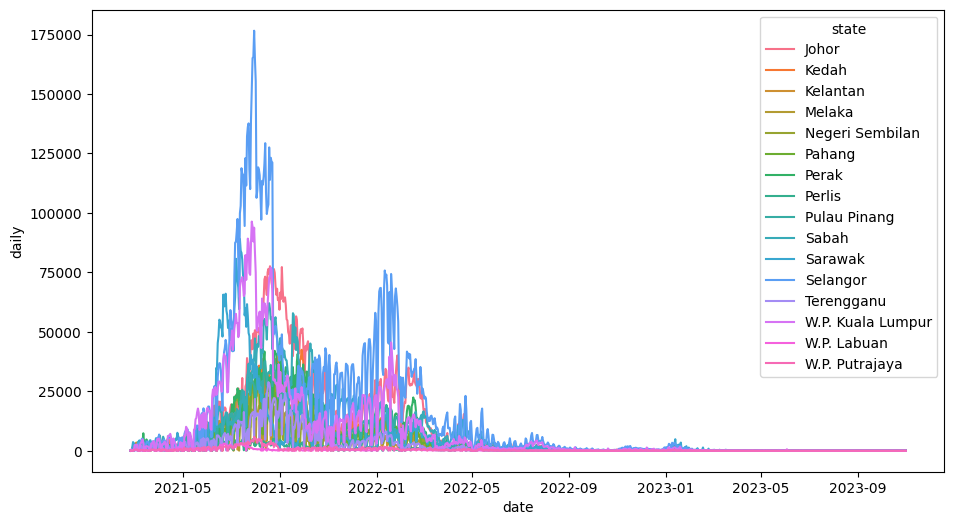

In [ ]:
fig, ax = plt.subplots(figsize=(11, 6))
g1 = sns.lineplot(data=vax, x='date', y='daily', hue='state', ax=ax)

#### 2.Average Vaccination Taken by Each State

None


state
Johor                 9089.877551
Kedah                 4218.797959
Kelantan              2881.342857
Melaka                2192.958163
Negeri Sembilan       2801.583673
Pahang                3243.819388
Perak                 5321.384694
Perlis                 522.323469
Pulau Pinang          4459.390816
Sabah                 6095.041837
Sarawak               6775.580612
Selangor             15090.572449
Terengganu            2264.391837
W.P. Kuala Lumpur     8511.776531
W.P. Labuan            231.008163
W.P. Putrajaya         436.185714
Name: daily, dtype: float64

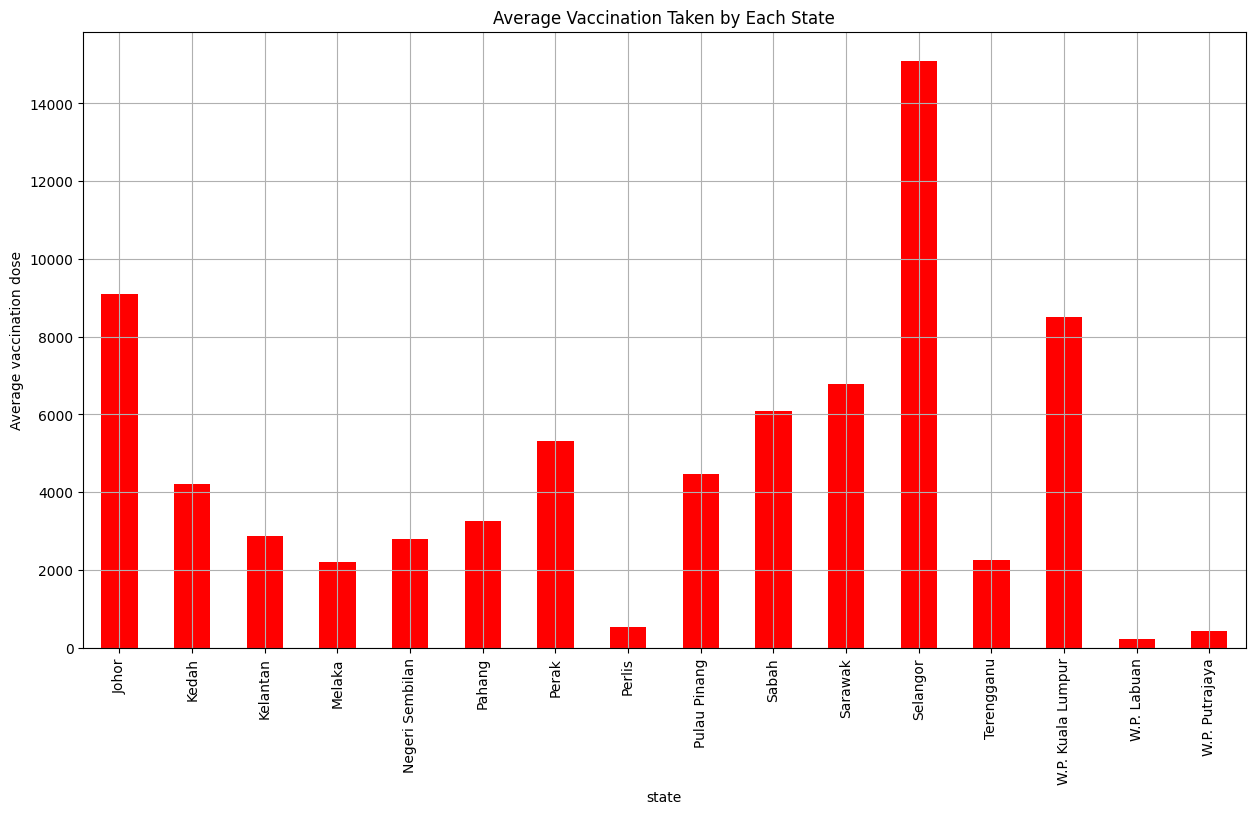

In [ ]:
plt.figure(figsize=(15,8))
plt.xlabel('State')
plt.ylabel('Average vaccination dose')
plt.title('Average Vaccination Taken by Each State')
sum_state = vax.groupby(['state'])['daily'].mean().plot(kind='bar', color='red').grid(True)
print(sum_state)
vax.groupby(['state'])['daily'].mean()

#### 3.Plotting Chart of Monthly Vaccination Dose from February 2021 to October 2023

Axes(0.125,0.11;0.775x0.77)


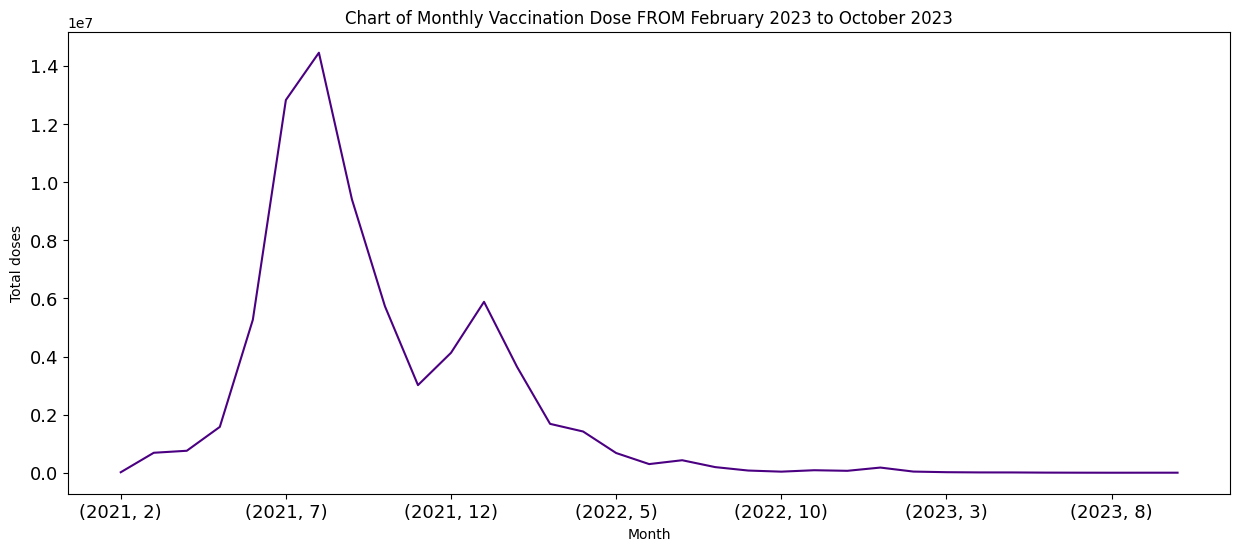

In [ ]:
from pandas.io.stata import StataReader
vax['Year'] = vax['date'].dt.year
vax['Month'] = vax['date'].dt.month
State_ = vax.groupby([vax['Year'], vax['Month']])['daily'].sum().plot(figsize=(15,6), color="indigo", fontsize=13, xlabel='Month', ylabel='Total doses', title='Chart of Monthly Vaccination Dose FROM February 2023 to October 2023')
print(State_)

#### 4.Bar chart of the Cummulative Vaccination Dose of Every State on 31 October 2023



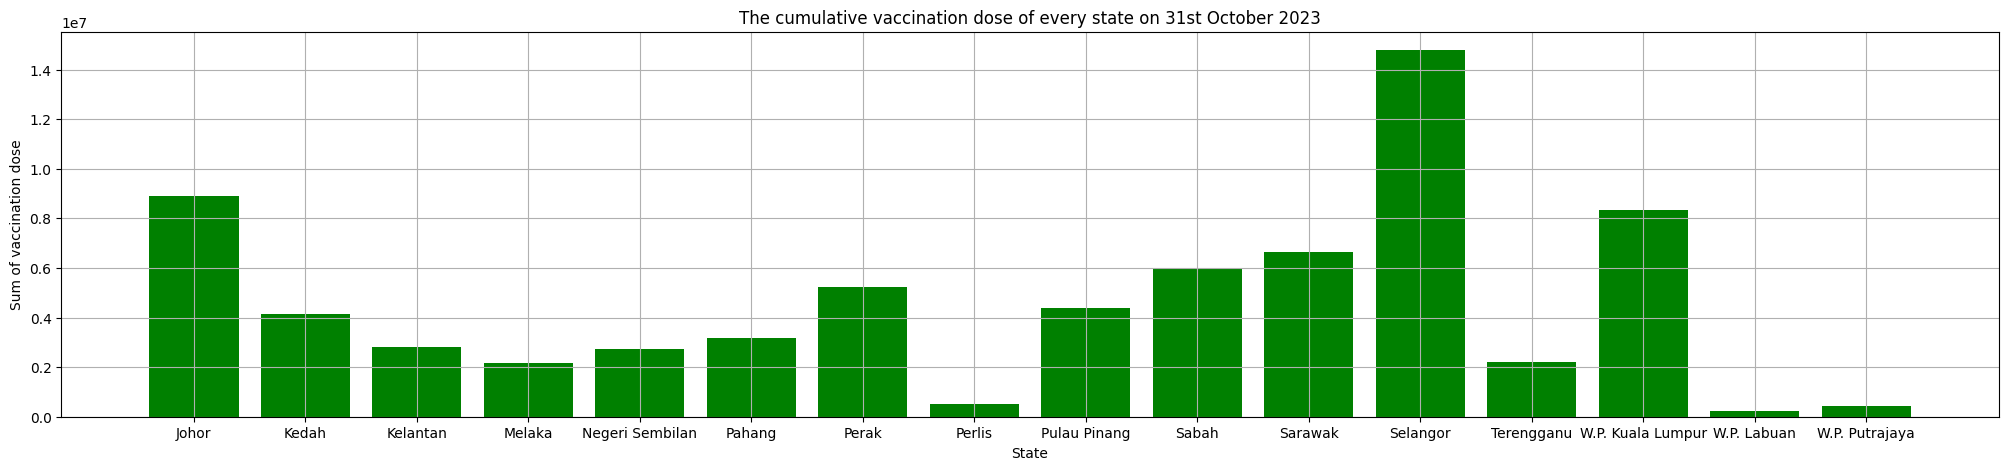

In [ ]:
#the last record shows the newest updates which clearly state the total in cumulative column
last_record = vax.tail(16)
#print(last_record)
plt_1 = plt.figure(figsize=(25, 5))
plt.xlabel('State')
plt.ylabel('Sum of vaccination dose')
plt.title('The cumulative vaccination dose of every state on 31st October 2023')
plt.bar(last_record.state, last_record.cumul, color='green')
plt.grid(True)


- Change the `date` datatype from object to datetime

In [ ]:
vax['date'] = pd.to_datetime(vax['date'])
vax.dtypes

date                    datetime64[ns]
state                           object
daily_partial                    int64
daily_full                       int64
daily_booster                    int64
daily_booster2                   int64
daily                            int64
daily_partial_adol               int64
daily_full_adol                  int64
daily_booster_adol               int64
daily_booster2_adol              int64
daily_partial_child              int64
daily_full_child                 int64
daily_booster_child              int64
daily_booster2_child             int64
cumul_partial                    int64
cumul_full                       int64
cumul_booster                    int64
cumul_booster2                   int64
cumul                            int64
cumul_partial_adol               int64
cumul_full_adol                  int64
cumul_booster_adol               int64
cumul_booster2_adol              int64
cumul_partial_child              int64
cumul_full_child         

#### 5.Line Grapgh of Fully vaccinations by months in 2021

<ipython-input-102-c74387877fd0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vax_2021['date'] = pd.to_datetime(vax_2021['date'])


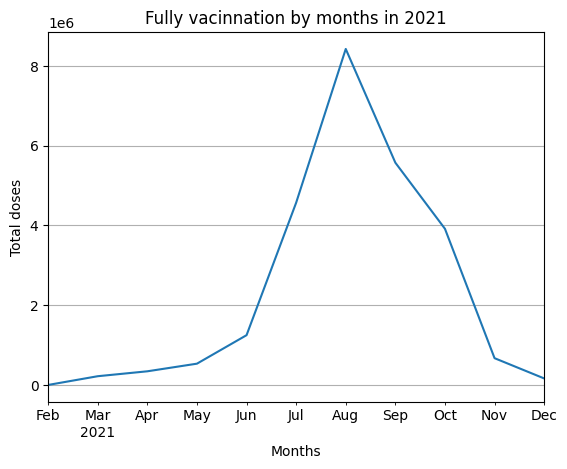

In [ ]:

vax_2021 = vax[vax['date'].dt.strftime('%Y') == '2021']
vax_2021['date'] = pd.to_datetime(vax_2021['date'])
vax_2021_month = vax_2021.groupby(vax_2021['date'].dt.to_period('M'))['daily_full'].sum()
#print(vax_2021_month)
fig1 = vax_2021_month.plot()
plt.title('Fully vacinnation by months in 2021')
plt.xlabel('Months')
plt.ylabel('Total doses')
plt.grid(True)


#### 6.Pie Chart of Fully Vaccination of Children in Every State updates on October 2023

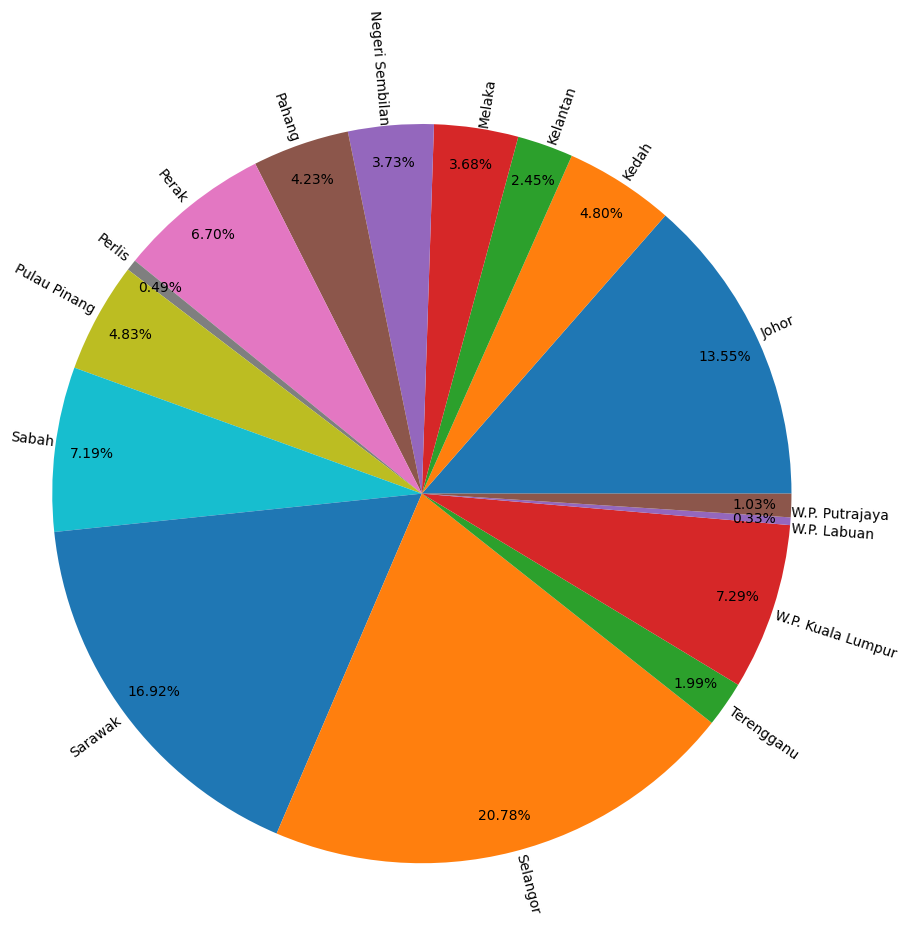

In [ ]:
fig3 = plt.pie(last_record.cumul_full_child, labels=last_record['state'].unique(), autopct='%.2f%%', labeldistance=1.0, radius=2.5,pctdistance = 0.9, rotatelabels = True)
plt.show()

#### 7.Total amount of vaccines and the types of vaccines used in Malaysia

{'sinovac': 21583315, 'pfizer': 45069601, 'sinopharm': 44309, 'az': 5708760, 'cansino': 226648}


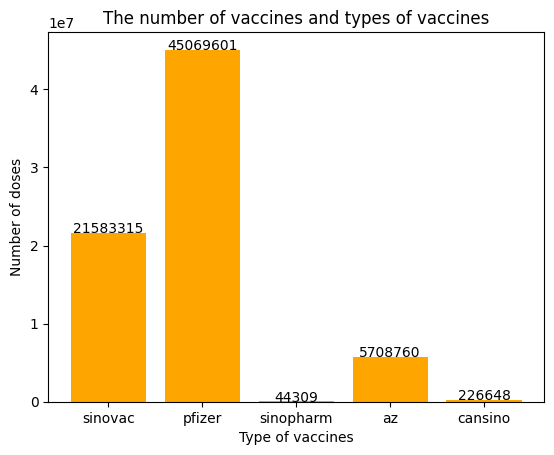

In [ ]:
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i, y[i], y[i], ha = 'center')
type_vaccine = {
  'sinovac' : vax['sinovac1'].sum() + vax['sinovac2'].sum() + vax['sinovac3'].sum() + vax['sinovac4'].sum(),
  'pfizer' : vax['pfizer1'].sum() + vax['pfizer2'].sum() + vax['pfizer3'].sum() + vax['pfizer4'].sum(),
  'sinopharm' : vax['sinopharm1'].sum() + vax['sinopharm2'].sum() + vax['sinopharm3'].sum() + vax['sinopharm4'].sum(),
  'az' : vax['astra1'].sum() + vax['astra2'].sum() + vax['astra3'].sum() + vax['astra4'].sum(),
  'cansino' : vax['cansino'].sum() + vax['cansino3'].sum() + vax['cansino4'].sum()
}
vac_brands = list(type_vaccine.keys())
vac_count = list(type_vaccine.values())
print(type_vaccine)
plt.bar(range(len(type_vaccine)), vac_count, tick_label=vac_brands, color='orange')
plt.xlabel('Type of vaccines')
plt.ylabel('Number of doses')
plt.title('The number of vaccines and types of vaccines')
addlabels(vac_brands, vac_count)
plt.show()

#### 8.Number of Boosters vaccine taken in Total in Malaysia

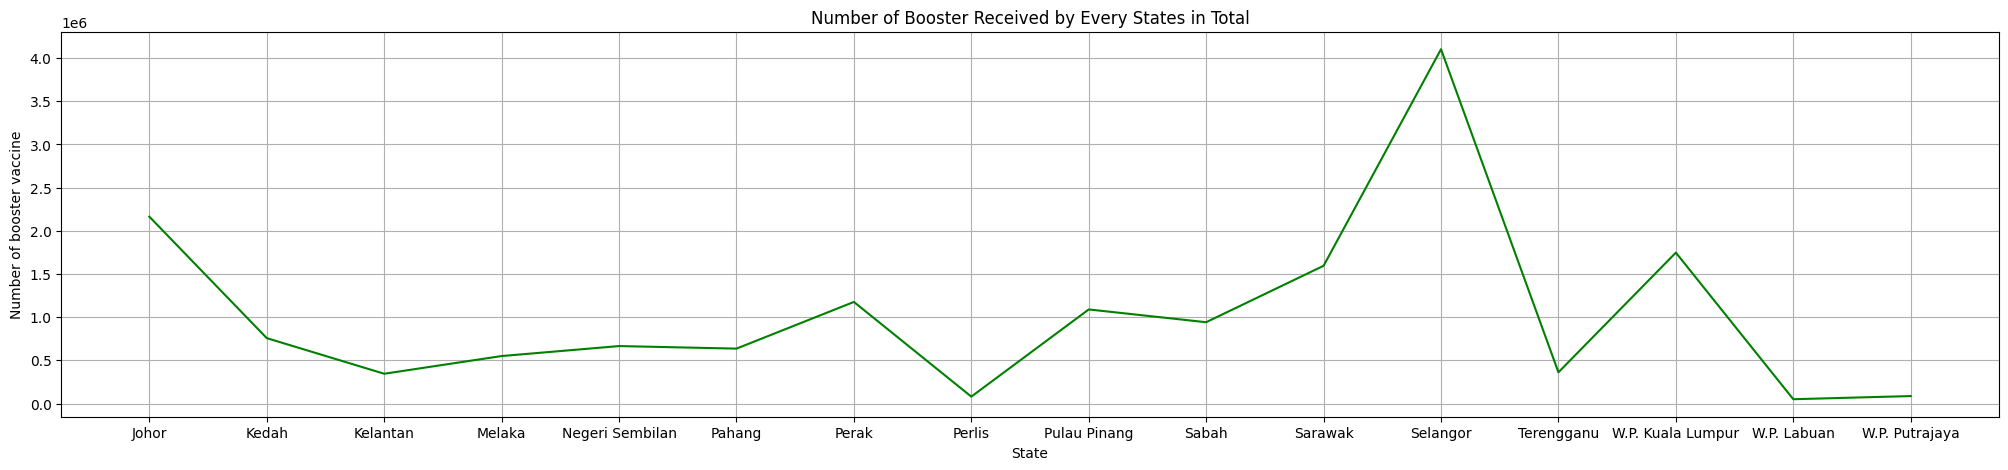

In [ ]:
#the last record shows the newest updates which clearly state the total in cumulative column
last_record = vax.tail(16)
#print(last_record)
plt.figure(figsize=(25, 5))
plt.grid(True)
plt.xlabel('State')
plt.ylabel('Number of booster vaccine')
plt.title('Number of Booster Received by Every States in Total')
plt.plot(last_record['state'], last_record['cumul_booster'], color='green')


#### 9.Percentage of adolescene have fully vaccination by states in Malaysia

([<matplotlib.patches.Wedge at 0x7f859758b280>,
 [Text(2.3287497171111338, 0.9093540317471596, 'Johor'),
  Text(1.4139432427613445, 2.06173822447214, 'Kedah'),
  Text(0.45149763277773347, 2.458892004053066, 'Kelantan'),
  Text(-0.2650437586608777, 2.4859106592946807, 'Melaka'),
  Text(-0.7883618345342186, 2.372442964087828, 'Negeri Sembilan'),
  Text(-1.4214883312965145, 2.0565434408219656, 'Pahang'),
  Text(-2.09951012005101, 1.3572240993304656, 'Perak'),
  Text(-2.374821383571519, 0.7811679692175405, 'Perlis'),
  Text(-2.4741043953681725, 0.3588975352658313, 'Pulau Pinang'),
  Text(-2.3414043964007654, -0.8762564992712847, 'Sabah'),
  Text(-1.3384049204528095, -2.1115568353486744, 'Sarawak'),
  Text(0.7309985534368896, -2.3907407042323046, 'Selangor'),
  Text(2.112851024592413, -1.3363609347323766, 'Terengganu'),
  Text(2.4291443246138695, -0.5909804143930896, 'W.P. Kuala Lumpur'),
  Text(2.497585340725207, -0.10985201770815052, 'W.P. Labuan'),
  Text(2.4996483801835803, -0.041928217

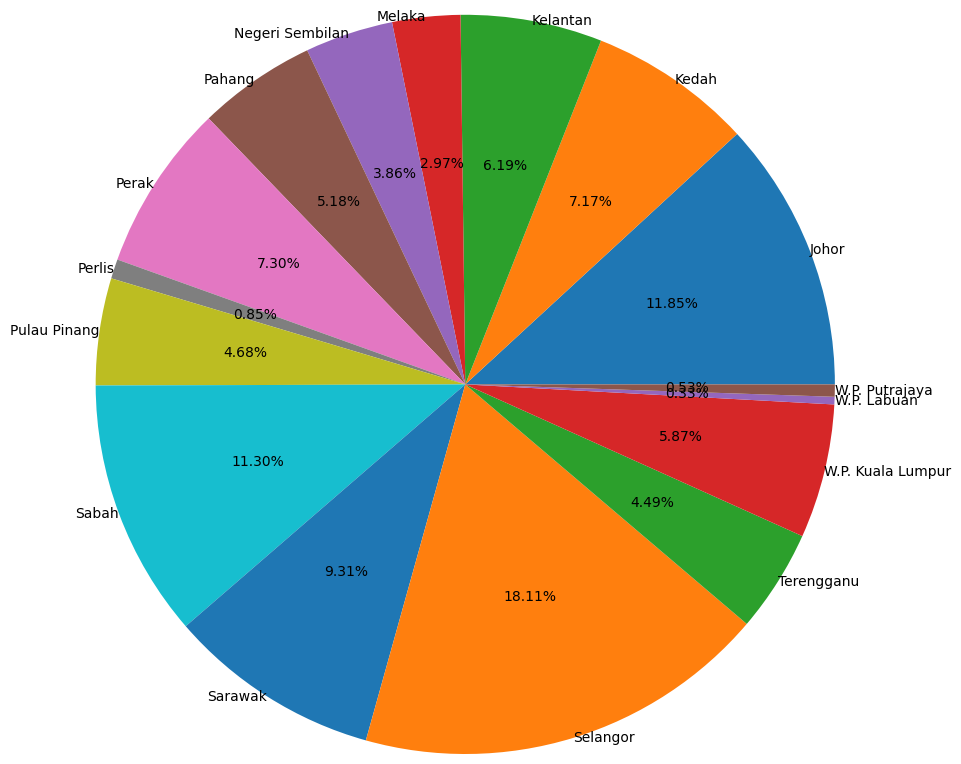

In [ ]:
#the last record shows the newest updates which clearly state the total in cumulative column
last_record = vax.tail(16)
#print(last_record)
l_state =list(last_record['state'])
l_cumul_adol =list(last_record['cumul_full_adol'])
plt.pie(x=l_cumul_adol, labels=l_state, autopct='%1.2f%%',radius=2.5, labeldistance=1.0)

#### 10.Number of 2nd booster recipients by states in Malaysia

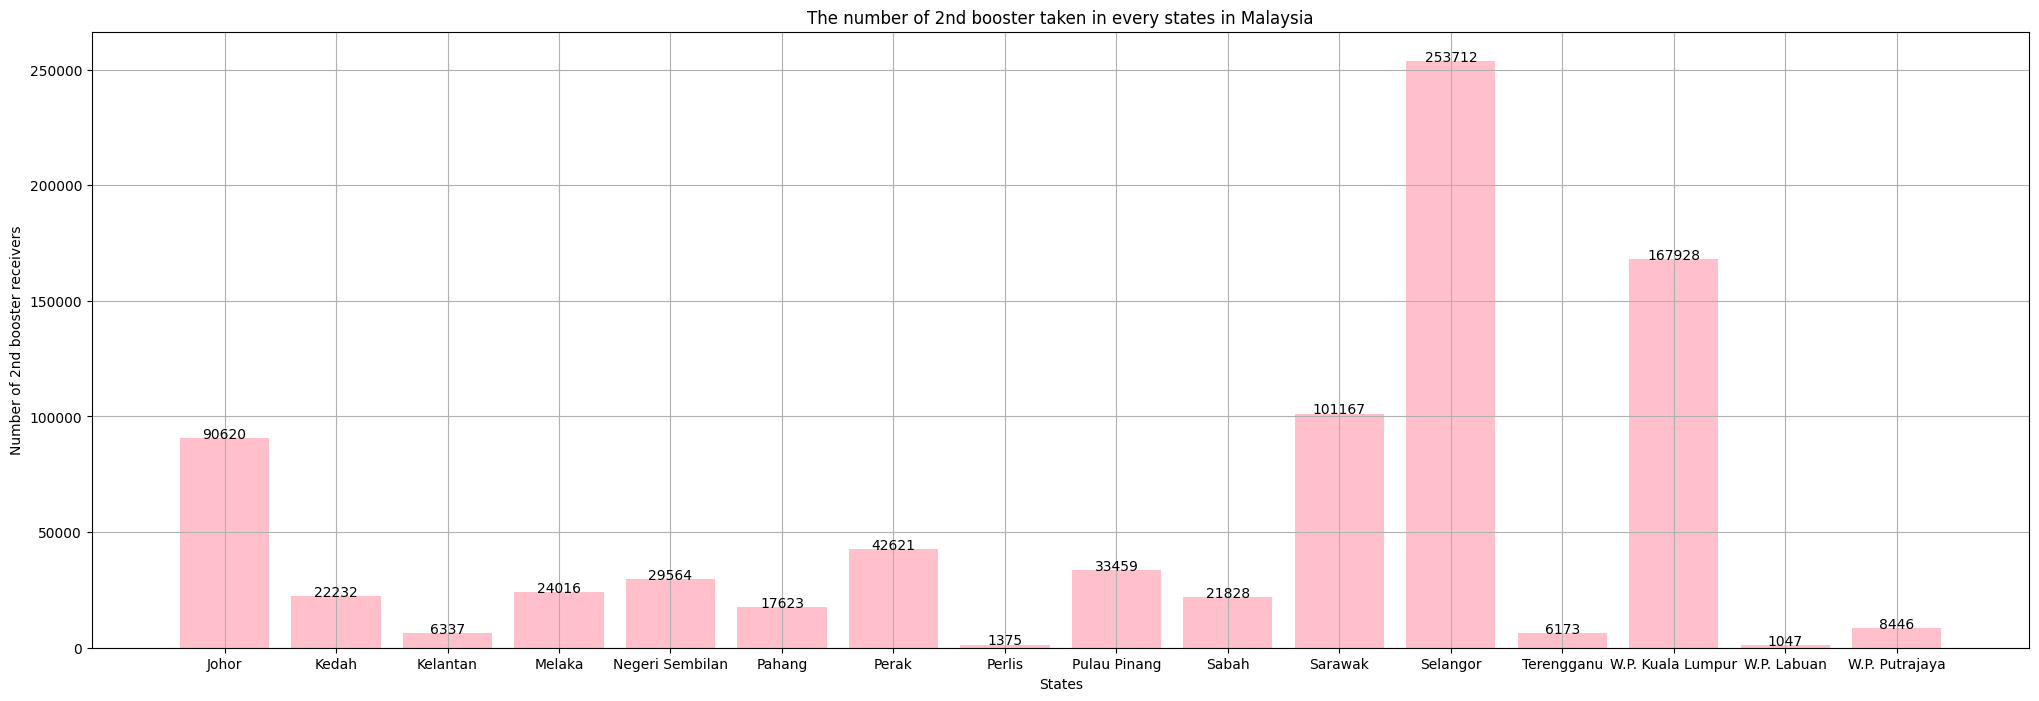

In [ ]:
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i, y[i], y[i], ha = 'center')
#the last record shows the newest updates which clearly state the total of the fields in cumulative column
last_record = vax.tail(16)
#print(last_record)
l_cumul_booster2 =list(last_record['cumul_booster2'])
plt.figure(figsize=(25, 8))
plt.bar(l_state, l_cumul_booster2, color='pink')
plt.xlabel('States')
plt.ylabel('Number of 2nd booster receivers')
plt.title('The number of 2nd booster taken in every states in Malaysia')
plt.grid(True)
addlabels(l_state, l_cumul_booster2)
plt.show()

### Questions and Answers (Q&A)

#### 1.Which peiod has the most vaccine taken in Malaysia?
*From the line plot graph below, we can clearly view that the most vaccine taken in Malysia is in between May 2021 to September 2021 as the peak period shown in the graph.*

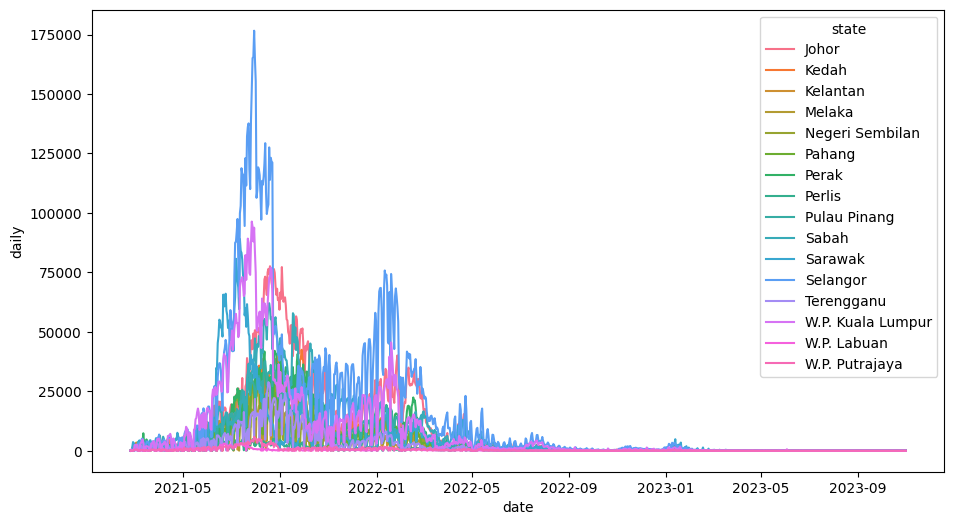

In [ ]:
fig, ax = plt.subplots(figsize=(11, 6))
g1 = sns.lineplot(data=vax, x='date', y='daily', hue='state', ax=ax)

#### 2.Where has the most vaccine received in daily average among states Malaysia?
*Selangor has the most vaccine received among states in Malaysia as there are around 15090 people received vaccine in daily average.*

state
Johor                 9089.877551
Kedah                 4218.797959
Kelantan              2881.342857
Melaka                2192.958163
Negeri Sembilan       2801.583673
Pahang                3243.819388
Perak                 5321.384694
Perlis                 522.323469
Pulau Pinang          4459.390816
Sabah                 6095.041837
Sarawak               6775.580612
Selangor             15090.572449
Terengganu            2264.391837
W.P. Kuala Lumpur     8511.776531
W.P. Labuan            231.008163
W.P. Putrajaya         436.185714
Name: daily, dtype: float64

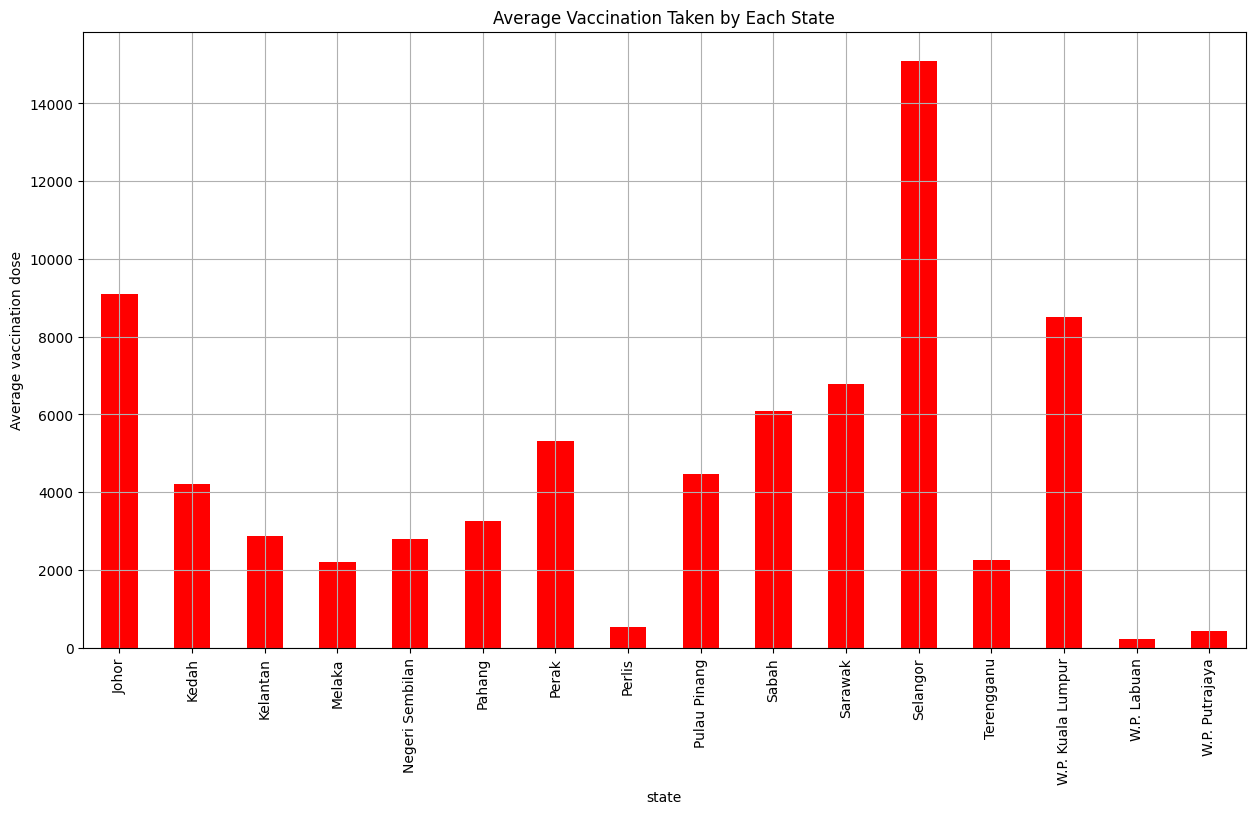

In [ ]:
plt.figure(figsize=(15,8))
plt.xlabel('State')
plt.ylabel('Average vaccination dose')
plt.title('Average Vaccination Taken by Each State')
sum_state = vax.groupby(['state'])['daily'].mean().plot(kind='bar', color='red').grid(True)
vax.groupby(['state'])['daily'].mean()

#### 3.Which month has the most vaccination among the vaccination program?
*August 2021 is the most vaccination month among the vacinnation program as the peak month which more than 14 million vaccine dose received in Malaysia.*

Axes(0.125,0.11;0.775x0.77)


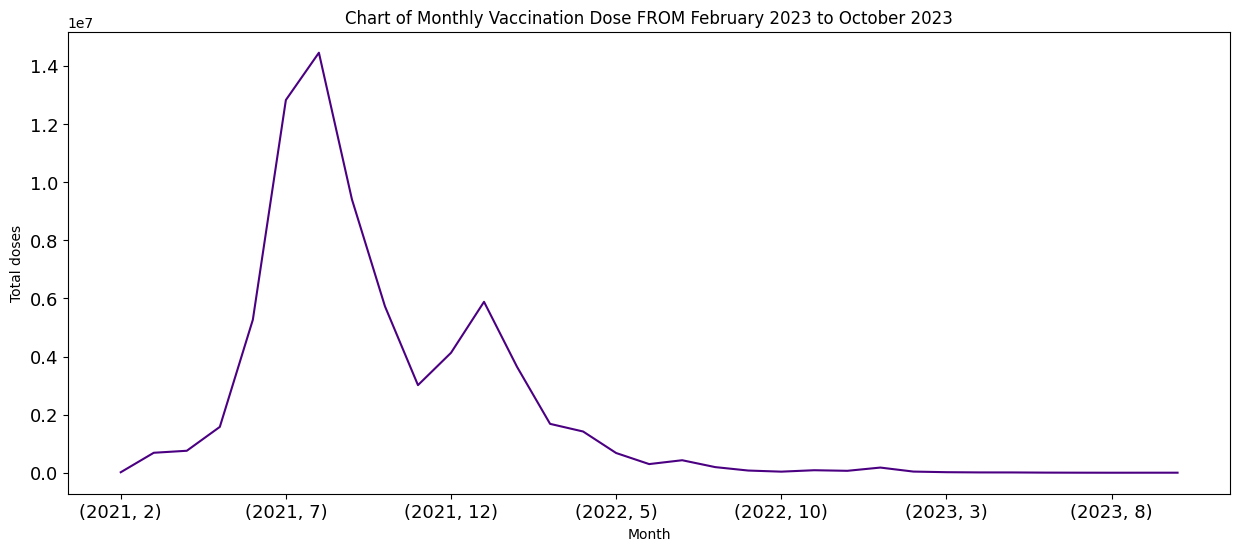

In [ ]:
from pandas.io.stata import StataReader
vax['Year'] = vax['date'].dt.year
vax['Month'] = vax['date'].dt.month
State_ = vax.groupby([vax['Year'], vax['Month']])['daily'].sum().plot(figsize=(15,6), color="indigo", fontsize=13, xlabel='Month', ylabel='Total doses', title='Chart of Monthly Vaccination Dose FROM February 2023 to October 2023')
print(State_)

#### 4.Which state has the most and which state has the least vaccine received in total in Malaysia?
*From the bar chart stated below, Selangor has the most vaccination count in total (more than 14 million) while Labuan has the least vaccination count in total(less than 100 thousand).*

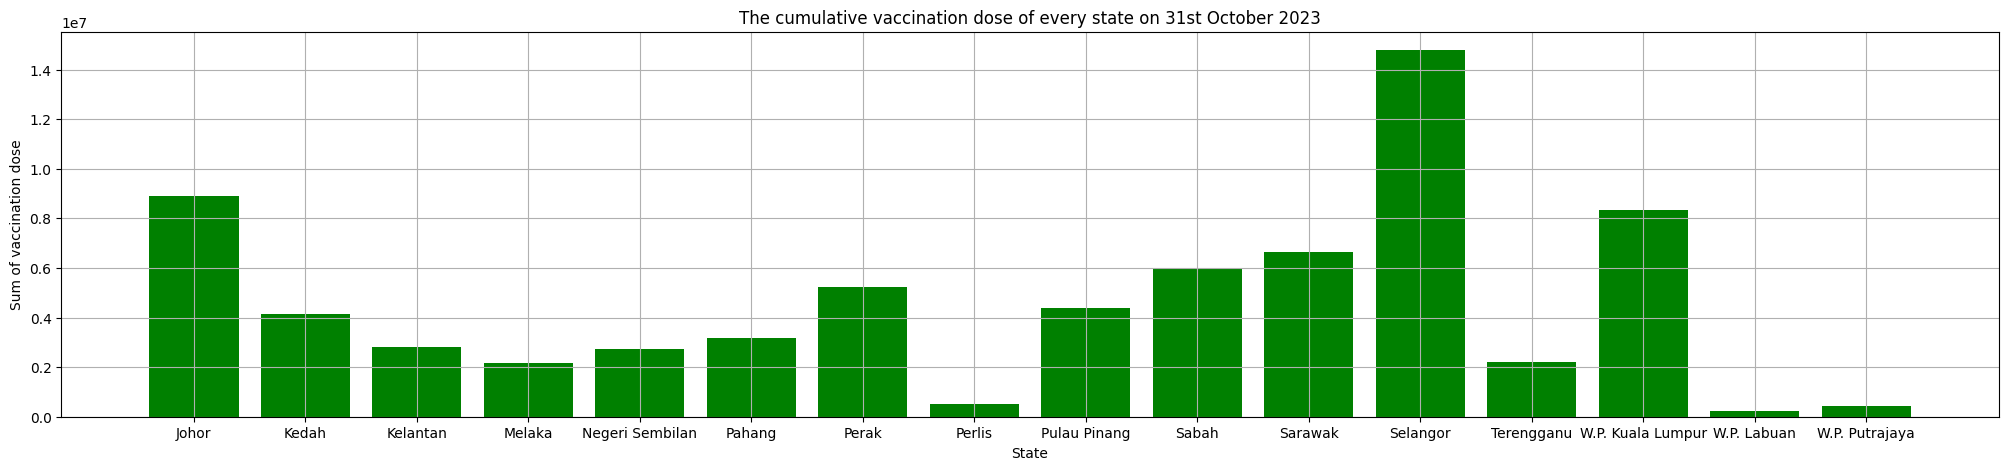

In [ ]:
#the last record shows the newest updates which clearly state the total in cumulative column
last_record = vax.tail(16)
#print(last_record)
plt_1 = plt.figure(figsize=(25, 5))
plt.xlabel('State')
plt.ylabel('Sum of vaccination dose')
plt.title('The cumulative vaccination dose of every state on 31st October 2023')
plt.bar(last_record.state, last_record.cumul, color='green')
plt.grid(True)

#### 5.Which month has the most and the least vaccination count in the year 2021?
*August is the most vaccination month in total in 2021 (more than 8 million) while February has the least vaccination count in 2021.*

<ipython-input-287-c74387877fd0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vax_2021['date'] = pd.to_datetime(vax_2021['date'])


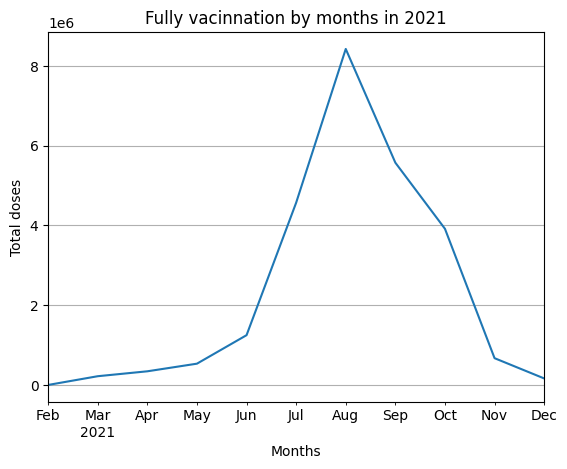

In [ ]:
vax_2021 = vax[vax['date'].dt.strftime('%Y') == '2021']
vax_2021['date'] = pd.to_datetime(vax_2021['date'])
vax_2021_month = vax_2021.groupby(vax_2021['date'].dt.to_period('M'))['daily_full'].sum()
#print(vax_2021_month)
fig1 = vax_2021_month.plot()
plt.title('Fully vacinnation by months in 2021')
plt.xlabel('Months')
plt.ylabel('Total doses')
plt.grid(True)

#### 6.Which state has the most and the least number of children who have fully vaccination in Malaysia?
*Selangor has the highest percentage of children who receive full-vaccination (20.78%) while Labuan has the least percenatage of children who receive full-vaccination (0.33%) in Malaysia.*

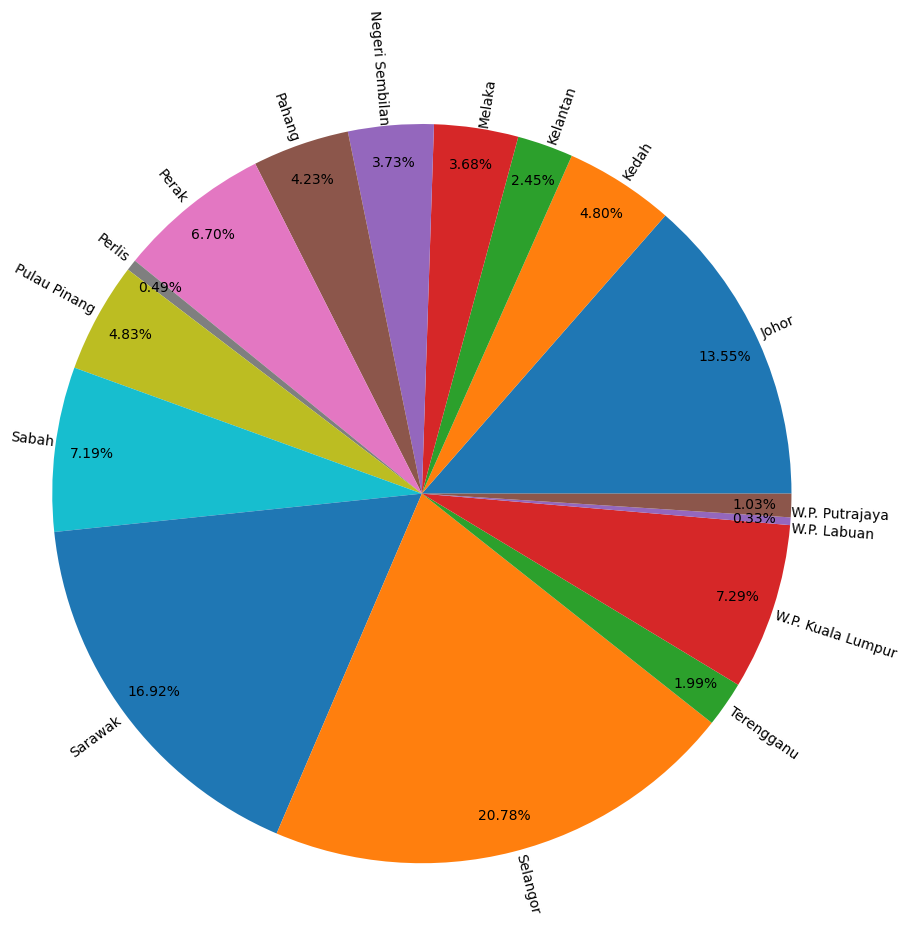

In [ ]:
fig3 = plt.pie(last_record.cumul_full_child, labels=last_record['state'].unique(), autopct='%.2f%%', labeldistance=1.0, radius=2.5,pctdistance = 0.9, rotatelabels = True)
plt.show()

#### 7.Rank the most used vaccine types to the least vaccine types in Malaysia
1. Pfizer (45069601)
2. Sinovac (21583315)
3. AstraZeneca (5708760)
4. Cansino (226648)
5. Sinopharm (44309)

{'sinovac': 21583315, 'pfizer': 45069601, 'sinopharm': 44309, 'az': 5708760, 'cansino': 226648}


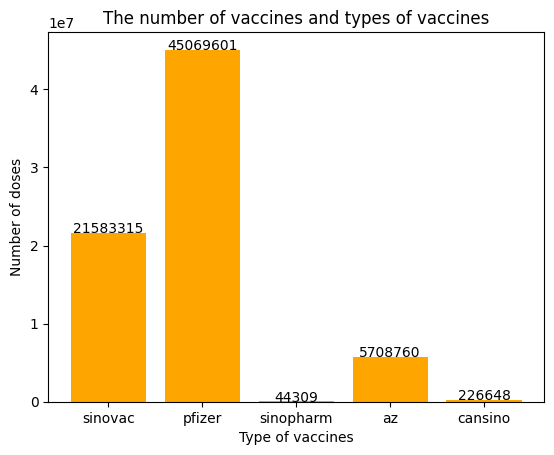

In [ ]:
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i, y[i], y[i], ha = 'center')
type_vaccine = {
  'sinovac' : vax['sinovac1'].sum() + vax['sinovac2'].sum() + vax['sinovac3'].sum() + vax['sinovac4'].sum(),
  'pfizer' : vax['pfizer1'].sum() + vax['pfizer2'].sum() + vax['pfizer3'].sum() + vax['pfizer4'].sum(),
  'sinopharm' : vax['sinopharm1'].sum() + vax['sinopharm2'].sum() + vax['sinopharm3'].sum() + vax['sinopharm4'].sum(),
  'az' : vax['astra1'].sum() + vax['astra2'].sum() + vax['astra3'].sum() + vax['astra4'].sum(),
  'cansino' : vax['cansino'].sum() + vax['cansino3'].sum() + vax['cansino4'].sum()
}
vac_brands = list(type_vaccine.keys())
vac_count = list(type_vaccine.values())
print(type_vaccine)
plt.bar(range(len(type_vaccine)), vac_count, tick_label=vac_brands, color='orange')
plt.xlabel('Type of vaccines')
plt.ylabel('Number of doses')
plt.title('The number of vaccines and types of vaccines')
addlabels(vac_brands, vac_count)
plt.show()

#### 8.Which state has more than 1.5 million booster vaccination recipients in Malaysia?
*Johor, Sarawak, Selangor and Kuala Lumpur has more than 1.5 million booster vaccination recipients in Malaysia.*

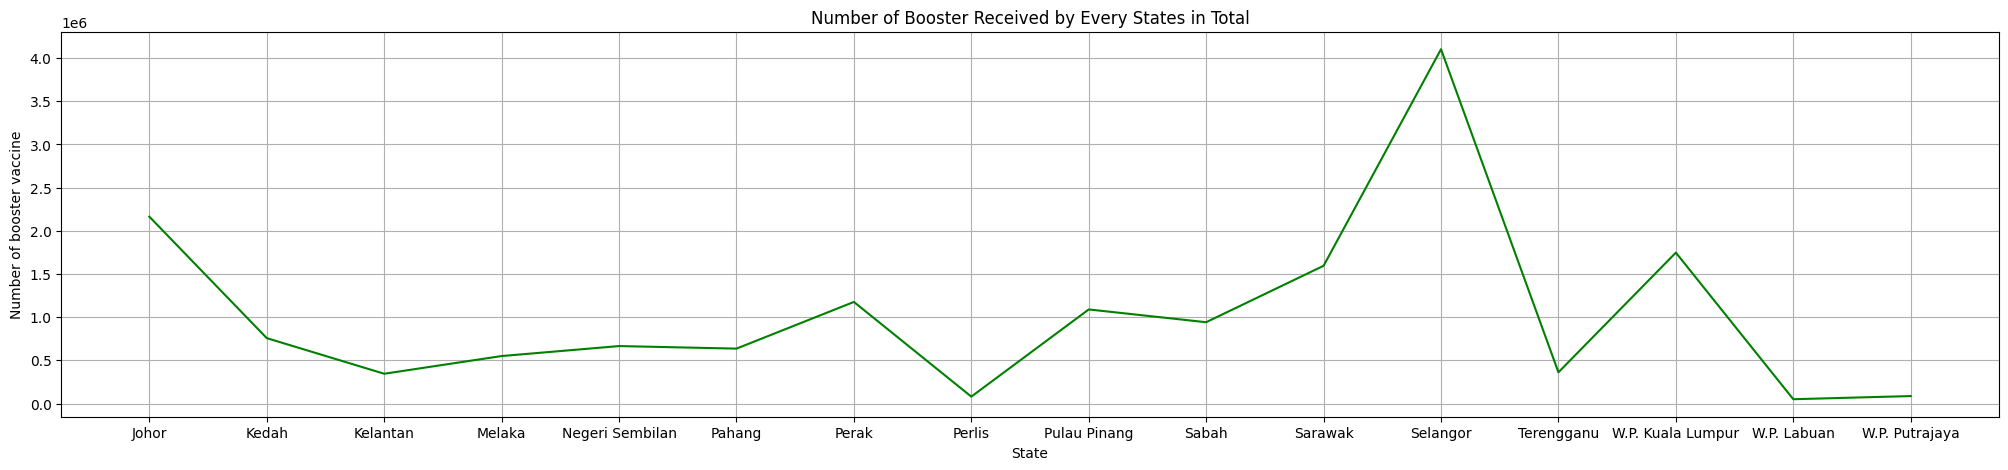

In [ ]:
#the last record shows the newest updates which clearly state the total in cumulative column
last_record = vax.tail(16)
#print(last_record)
plt.figure(figsize=(25, 5))
plt.grid(True)
plt.xlabel('State')
plt.ylabel('Number of booster vaccine')
plt.title('Number of Booster Received by Every States in Total')
plt.plot(last_record['state'], last_record['cumul_booster'], color='green')


#### 9.5 States that have the most recipients from adolescenes who is fully-vaccinated.
*5 States that have most recipients from adolescenes who is fully-vaccinated are Selangor, Johor, Sabah, Sarawak, Perak, Kedah.*

([<matplotlib.patches.Wedge at 0x7f85974589a0>,
 [Text(2.3287497171111338, 0.9093540317471596, 'Johor'),
  Text(1.4139432427613445, 2.06173822447214, 'Kedah'),
  Text(0.45149763277773347, 2.458892004053066, 'Kelantan'),
  Text(-0.2650437586608777, 2.4859106592946807, 'Melaka'),
  Text(-0.7883618345342186, 2.372442964087828, 'Negeri Sembilan'),
  Text(-1.4214883312965145, 2.0565434408219656, 'Pahang'),
  Text(-2.09951012005101, 1.3572240993304656, 'Perak'),
  Text(-2.374821383571519, 0.7811679692175405, 'Perlis'),
  Text(-2.4741043953681725, 0.3588975352658313, 'Pulau Pinang'),
  Text(-2.3414043964007654, -0.8762564992712847, 'Sabah'),
  Text(-1.3384049204528095, -2.1115568353486744, 'Sarawak'),
  Text(0.7309985534368896, -2.3907407042323046, 'Selangor'),
  Text(2.112851024592413, -1.3363609347323766, 'Terengganu'),
  Text(2.4291443246138695, -0.5909804143930896, 'W.P. Kuala Lumpur'),
  Text(2.497585340725207, -0.10985201770815052, 'W.P. Labuan'),
  Text(2.4996483801835803, -0.041928217

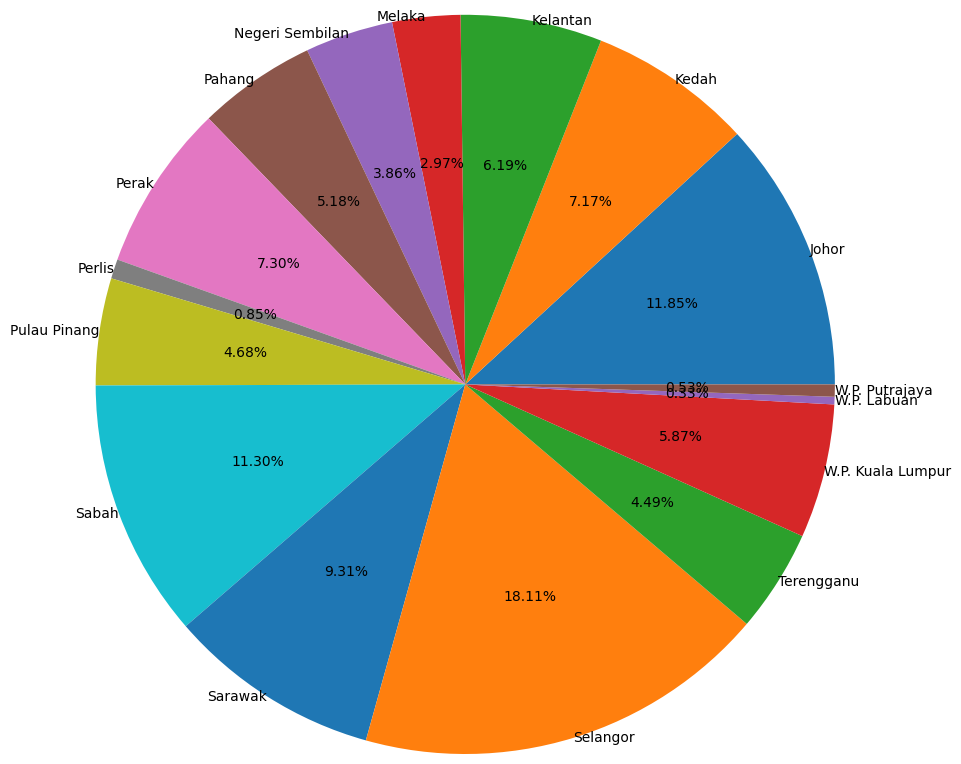

In [ ]:
#the last record shows the newest updates which clearly state the total in cumulative column
last_record = vax.tail(16)
#print(last_record)
l_state =list(last_record['state'])
l_cumul_adol =list(last_record['cumul_full_adol'])
plt.pie(x=l_cumul_adol, labels=l_state, autopct='%1.2f%%',radius=2.5, labeldistance=1.0)

#### 10.How many 2nd booster recipients in the most vaccination count state?
*253712 people received 2nd booster in Selangor state.*

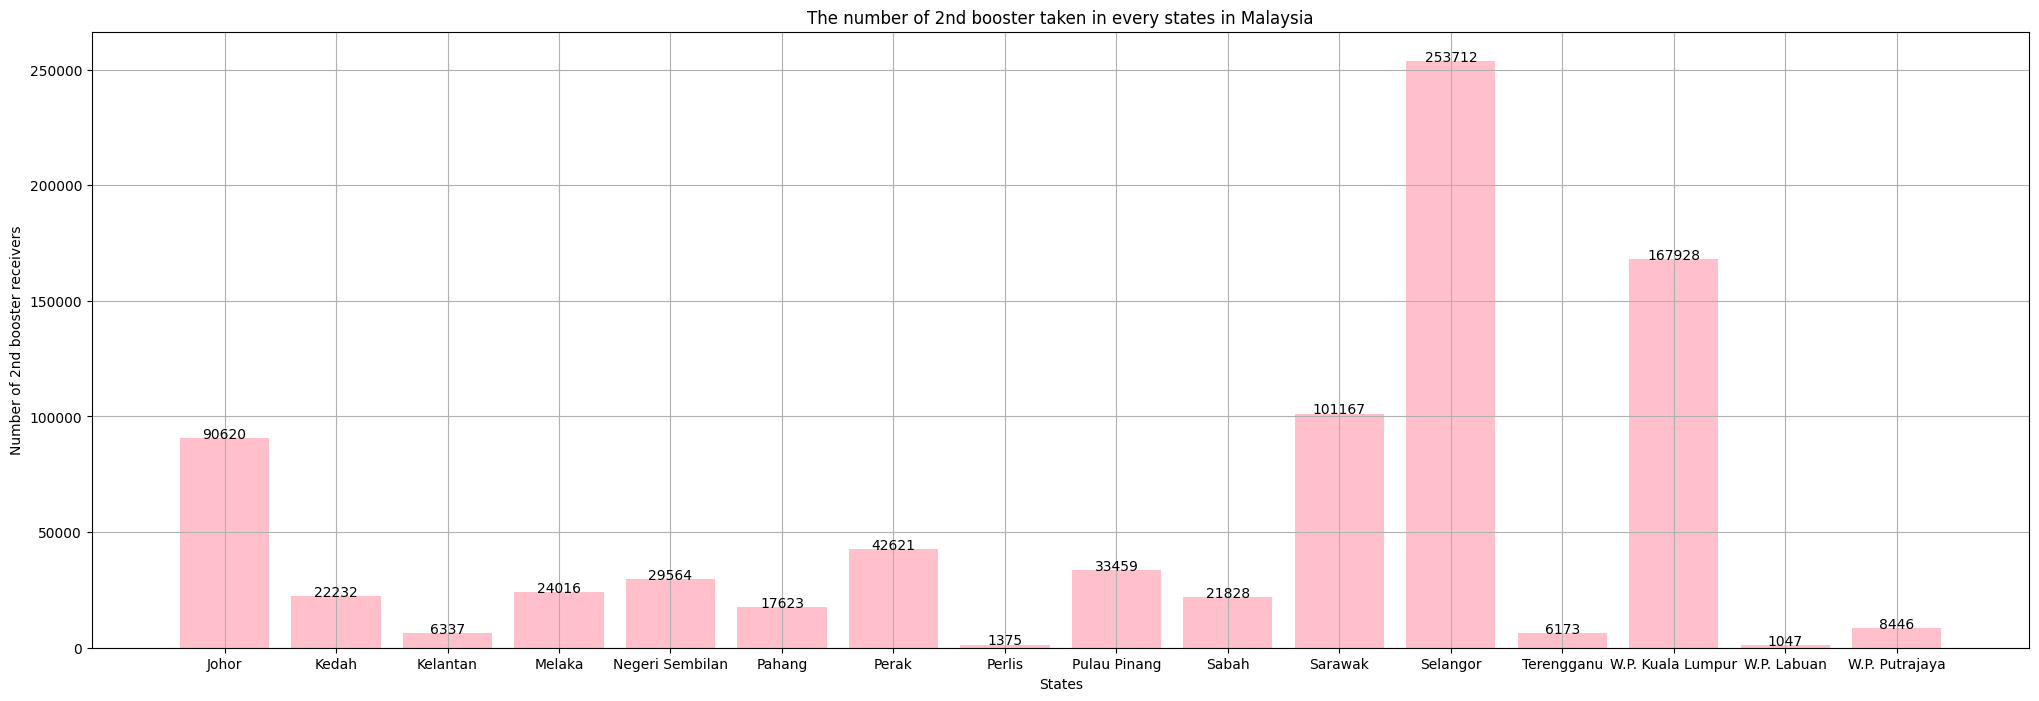

In [ ]:
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i, y[i], y[i], ha = 'center')
#the last record shows the newest updates which clearly state the total of the fields in cumulative column
last_record = vax.tail(16)
#print(last_record)
l_cumul_booster2 =list(last_record['cumul_booster2'])
plt.figure(figsize=(25, 8))
plt.bar(l_state, l_cumul_booster2, color='pink')
plt.xlabel('States')
plt.ylabel('Number of 2nd booster receivers')
plt.title('The number of 2nd booster taken in every states in Malaysia')
plt.grid(True)
addlabels(l_state, l_cumul_booster2)
plt.show()

### Summary and Conclusion

From the exploratory about dataset through graphs and charts above, Selangor has the most vaccination count among other states and the mid of the year 2021 is the peak period for vaccination program in Malaysia.

There are some interesting insights and graphs from previous section. From the graph showing the percentage of adolescene received full vaccination, we can see that the most vaccination state is Selangor, Johor, Sarawak, Perak and Kedah. Considering the population among the state like Selangor, Johor, Kuala Lumpur and Sarawak which has higher popullation, meanwhile the percentage of adolescenes received fully vaccination in Sabah and Perak is considered much higher if correlated to population.

The idea I have for future works on this dataset is doing further analysis on the types of vaccine provided for vaccination and investigate the relationships between the vaccine's brands and the cummulative frequency of vaccine chosen among people in order to find out which type of vaccine is the most trusted in Malaysia.

**Useful Links to resource to find useful during your analysis**

[Pie Chart Toturial](https://www.geeksforgeeks.org/plot-a-pie-chart-in-python-using-matplotlib/)

[Group Data Frame by Date and Time](https://www.geeksforgeeks.org/how-to-group-pandas-dataframe-by-date-and-time/)

[Adding Value Label on Bar Chart](https://www.geeksforgeeks.org/adding-value-labels-on-a-matplotlib-bar-chart/)

[Setting for Graphs and Charts](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.colorbar.html)